In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import netCDF4
from global_land_mask import globe
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [8]:
a = '/media/rakshith/Seagate Expansion Drive/mraks/TGMS ERA 1959-2021, India only.nc'
b = '/media/rakshith/Seagate Expansion Drive/mraks/ERA levels.nc'

In [9]:
ds1 = xr.open_dataset(a)
#ds2 = xr.open_dataset(b)

In [10]:
year = '1960-06-01'
lev = 1000
pwat = ds1.tcwv.sel(time=year)
prec = ds1.mtpr.sel(time=year)
u = ds2.u.sel(time=year, level=lev).values
v = ds2.v.sel(time=year, level=lev).values

NameError: name 'ds2' is not defined

In [5]:
lon = ds1.longitude.values
lat = ds1.latitude.values

lon2D, lat2D = np.meshgrid(lon, lat)

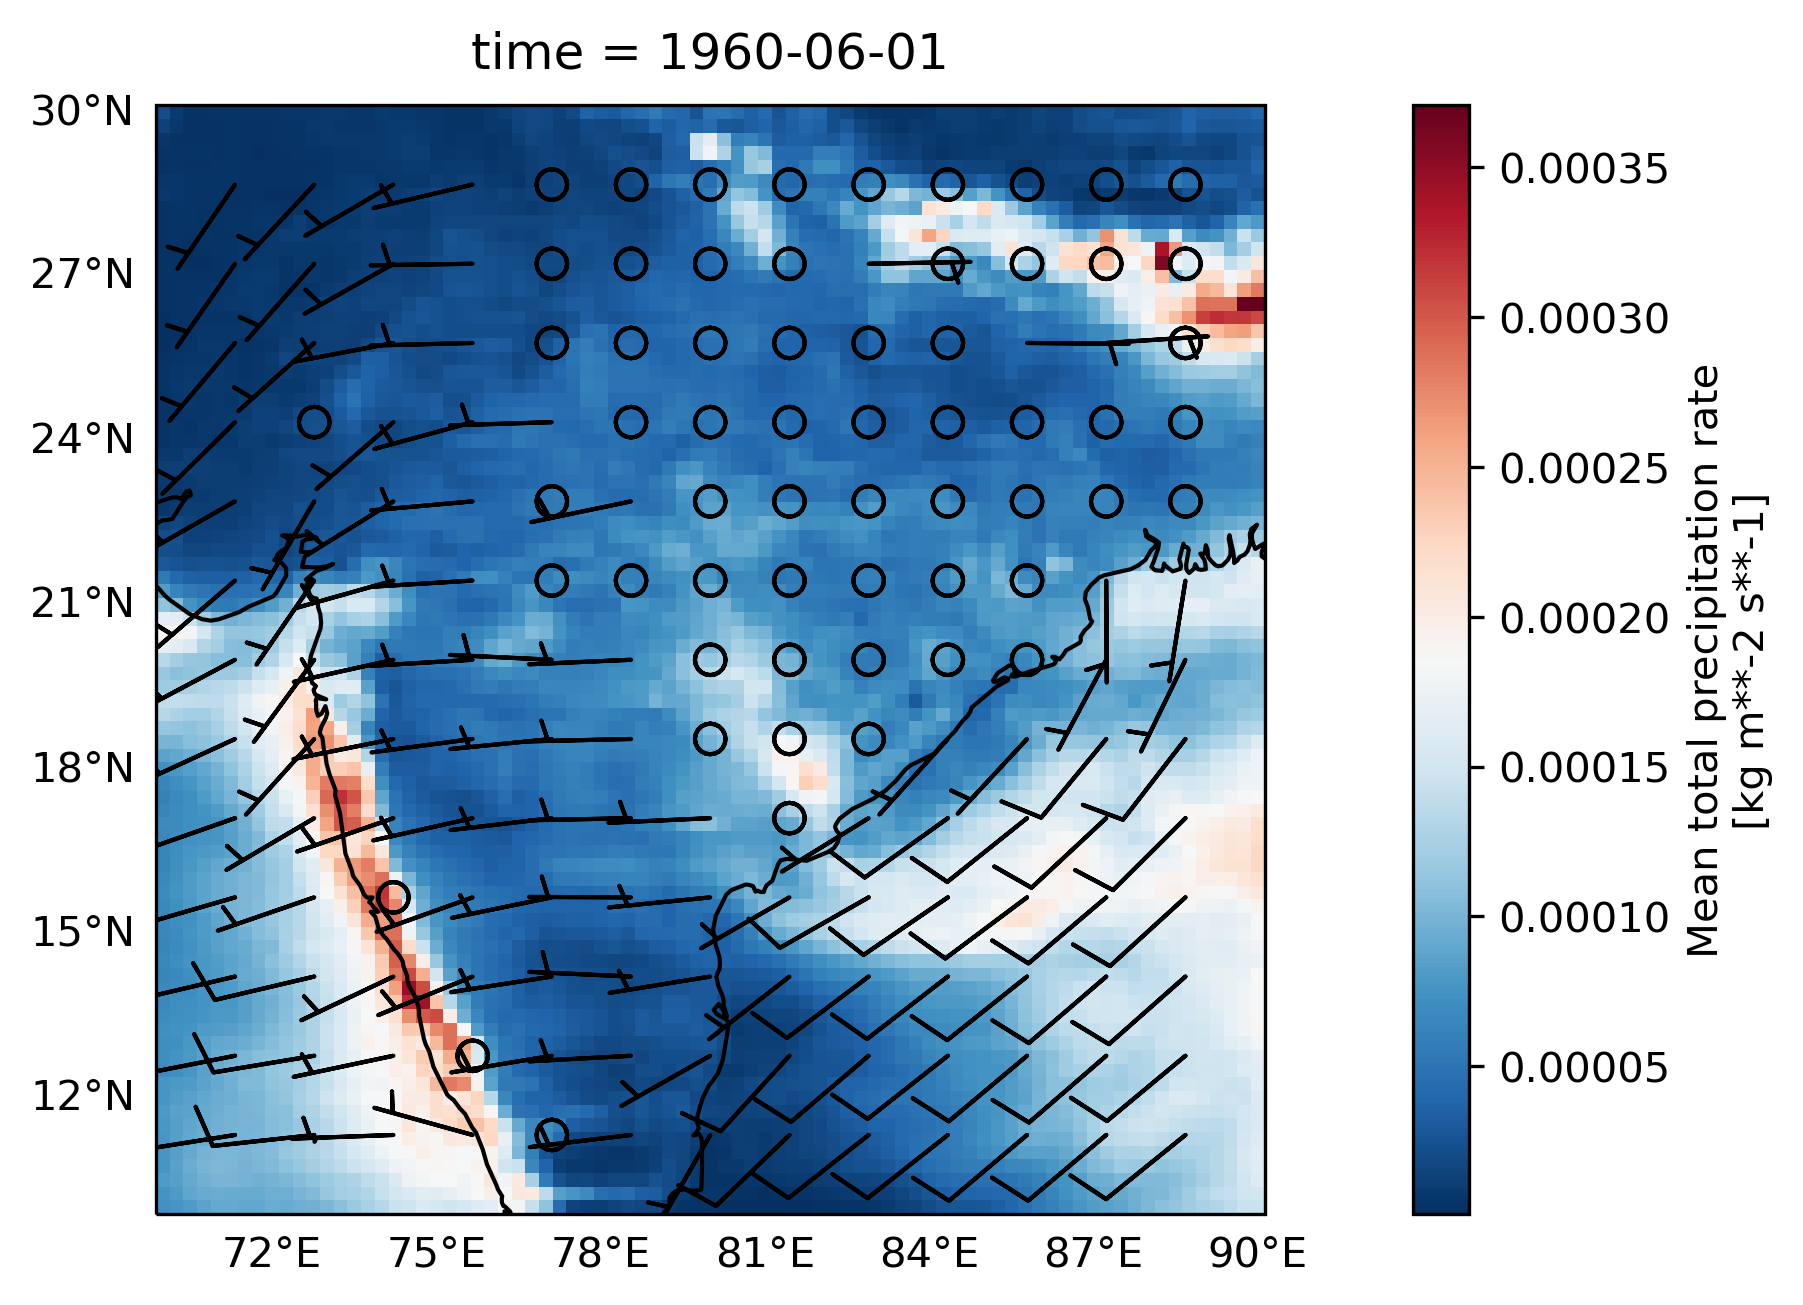

In [19]:
#Adding barbs
ax = plt.axes(projection=ccrs.PlateCarree())
gls = ax.gridlines(draw_labels=True, color='none') #color='none' makes gridlines invisible
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax.coastlines()
prec.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r', cbar_kwargs={'orientation': 'vertical', 'pad':0.1})
ax.barbs(lon2D, lat2D, u, v, regrid_shape=15, transform=ccrs.PlateCarree())
plt.show()

In [1]:
#NASA type discrete colorbar
ax = plt.axes(projection=ccrs.PlateCarree())
gls = ax.gridlines(draw_labels=True, color='none') #color='none' makes gridlines invisible
gls.top_labels=False   # suppress top labels
gls.right_labels=False # suppress right labels
ax.coastlines()
pwat.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='plasma', levels=11, cbar_kwargs={'orientation': 'vertical', 'pad':0.1})
ax.quiver(lon2D, lat2D, u, v, regrid_shape=15, transform=ccrs.PlateCarree())
plt.show()

NameError: name 'plt' is not defined

# MSE profile

In [2]:
c = '/media/rakshith/Seagate Expansion Drive/mraks/VMS.nc'
ds3 = xr.open_dataset(c)
g = 9.80616
Cp = 1004.64
Lv = 2.501e6

f1 = netCDF4.Dataset(c)

In [4]:
ds3

<xarray.Dataset>
Dimensions:    (longitude: 81, latitude: 81, level: 37, time: 756)
Coordinates:
  * longitude  (longitude) float32 70.0 70.25 70.5 70.75 ... 89.5 89.75 90.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... 10.5 10.25 10.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time       (time) datetime64[ns] 1959-01-01 1959-02-01 ... 2021-12-01
Data variables:
    z          (time, level, latitude, longitude) float32 ...
    q          (time, level, latitude, longitude) float32 ...
    t          (time, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-02-25 10:30:44 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [3]:
lon_grid1, lat_grid1 = np.meshgrid(ds3.longitude, ds3.latitude)
v1 = globe.is_land(lat_grid1, lon_grid1)

In [16]:
j=10
m=[]
for k in range(37):
    m1 = np.array(Cp*f1['t'][j,k,:,:] + f1['z'][j,k,:,:] + Lv*f1['q'][j,k,:,:])
    m2 = np.multiply(v1, m1)
    m.append(np.average(m2[np.nonzero(m2)]))

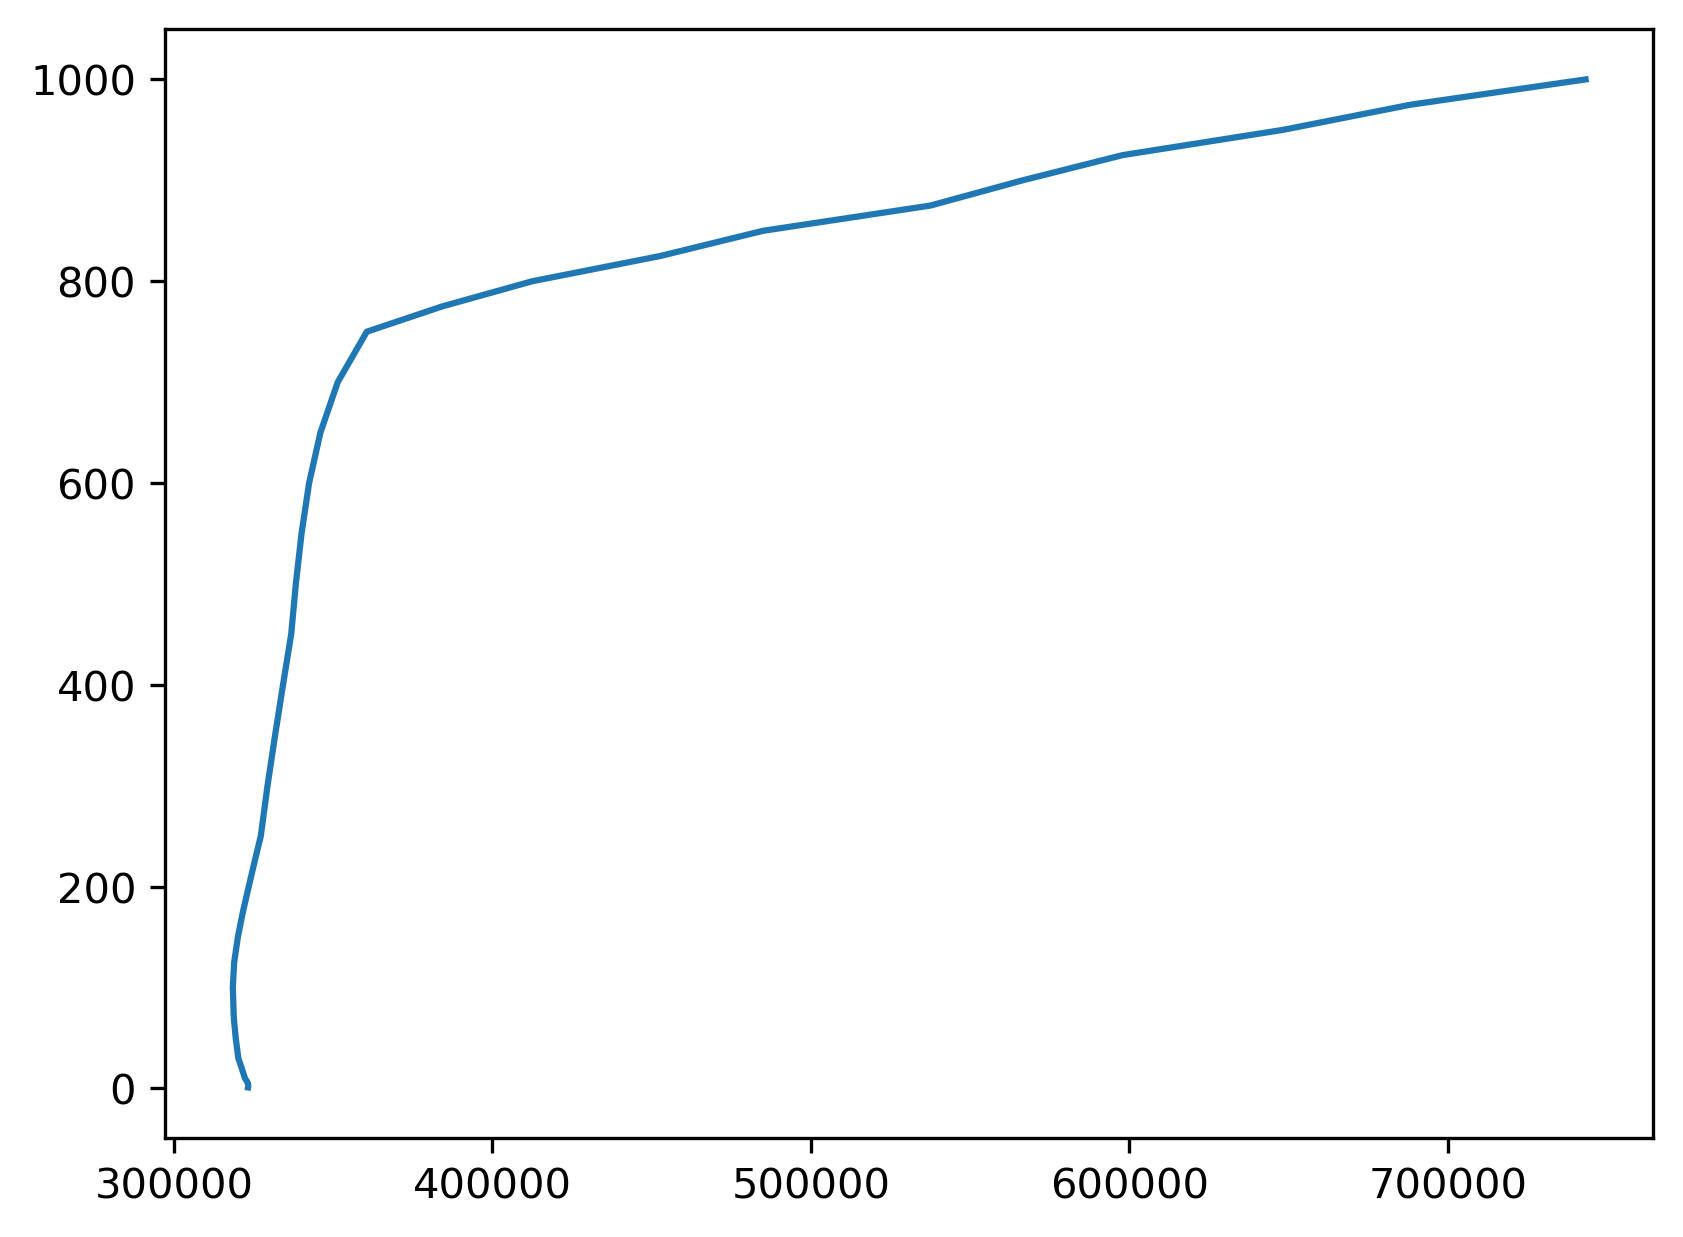

In [28]:
X = np.flip(ds3.level)
plt.plot(m, X)